📤 Upload your pose_model.tflite:


Saving model_unquant.tflite to model_unquant.tflite
📤 Upload your labels.txt:


Saving labels.txt to labels.txt
✅ Labels: ['0 Happy', '1 Surprise', '2 Neutral']
📤 Upload an image to classify:


Saving WIN_20250419_12_04_32_Pro.jpg to WIN_20250419_12_04_32_Pro.jpg


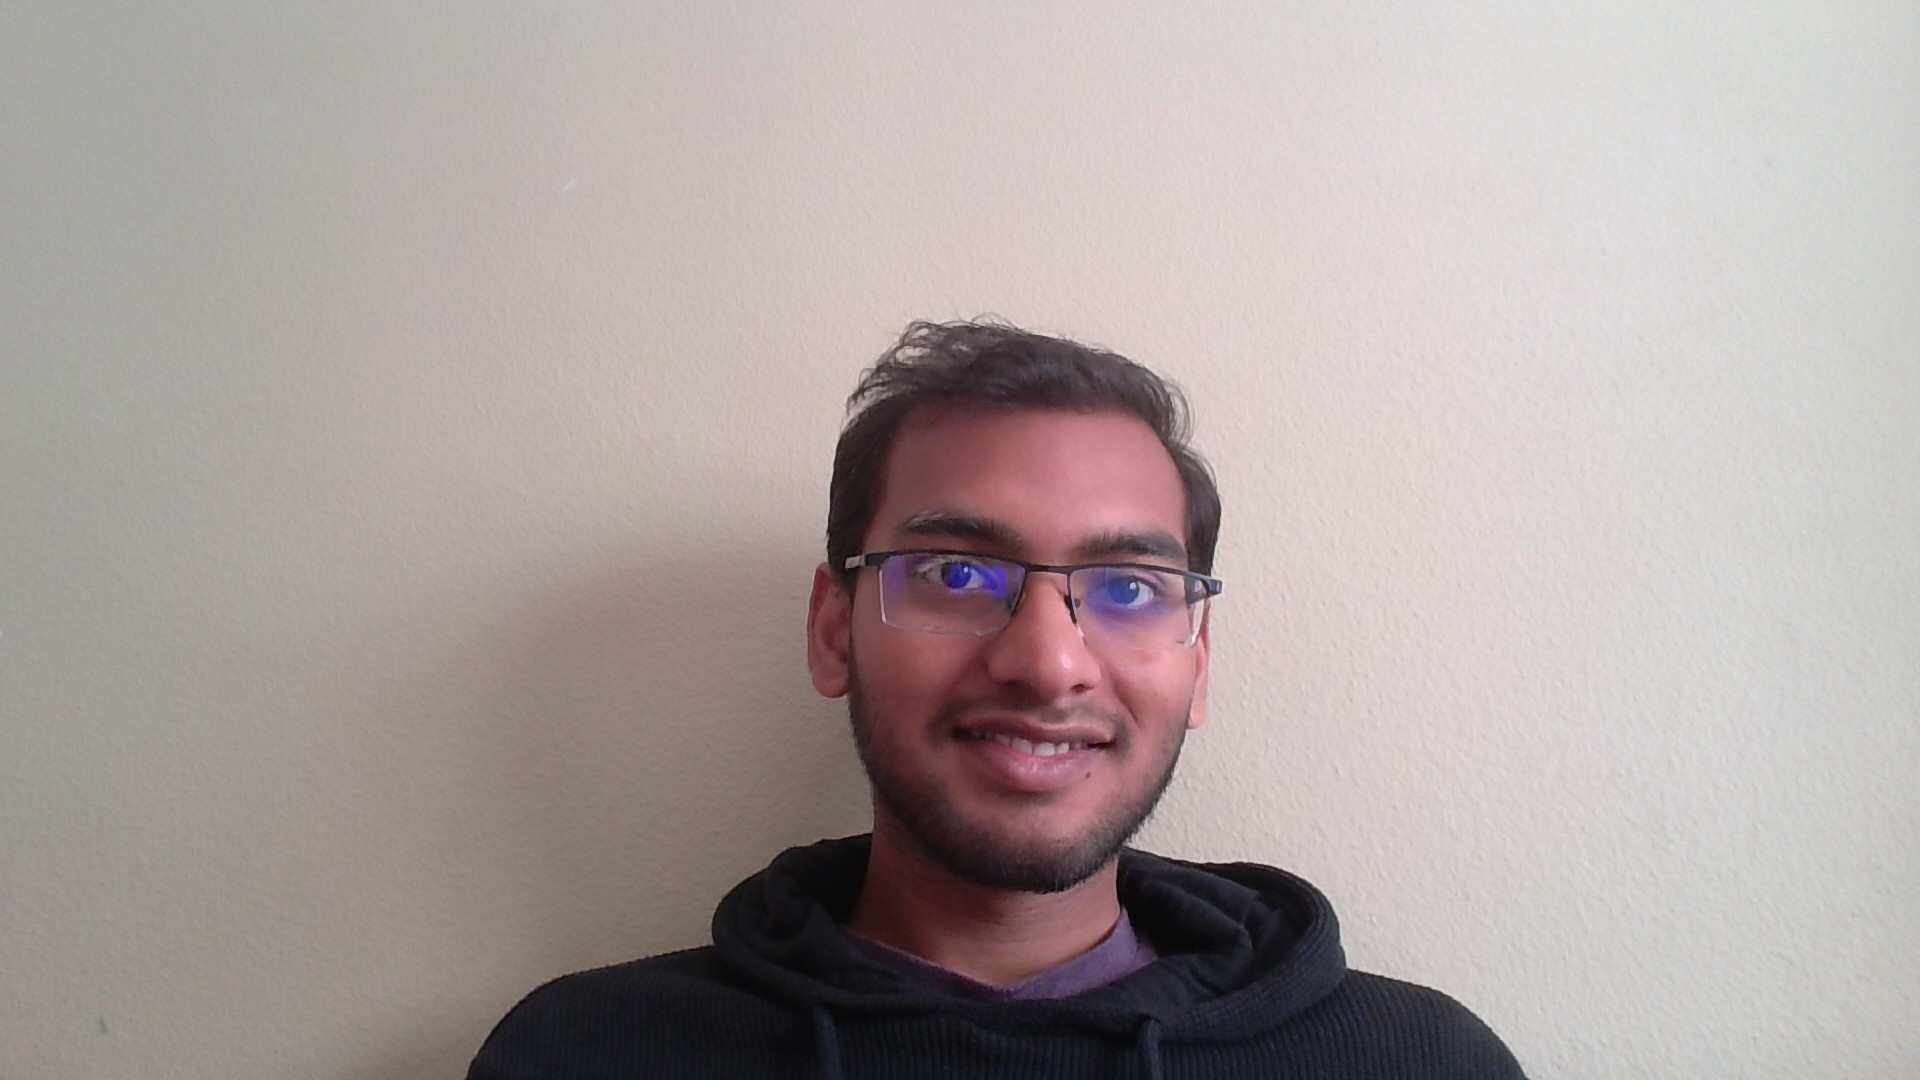

🔍 Prediction: 0 Happy (98.44%)


In [ ]:
# STEP 1: Install dependencies
!pip install -q tensorflow opencv-python
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files
from IPython.display import Image, display

# STEP 2: Upload your TFLite pose model + labels
print("📤 Upload your pose_model.tflite:")
uploaded = files.upload()
tflite_model_path = next(iter(uploaded))

print("📤 Upload your labels.txt:")
uploaded = files.upload()
labels_path = next(iter(uploaded))

# STEP 3: Read labels
with open(labels_path, 'r') as f:
    labels = [line.strip() for line in f.readlines()]
print("✅ Labels:", labels)

# STEP 4: Upload a test frame (JPEG/PNG) showing one of your poses
print("📤 Upload an image to classify:")
uploaded = files.upload()
img_path = next(iter(uploaded))
display(Image(img_path))

# STEP 5: Load and initialize TFLite interpreter
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()
input_details  = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# STEP 6: Preprocess the image
#    - Resize to model’s expected input size
#    - Normalize to [0,1]
_, height, width, _ = input_details[0]['shape']
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (width, height))
img = img.astype(np.float32) / 255.0
input_tensor = np.expand_dims(img, axis=0)

# STEP 7: Run inference
interpreter.set_tensor(input_details[0]['index'], input_tensor)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# STEP 8: Decode and print prediction
pred_idx   = np.argmax(output_data[0])
confidence = output_data[0][pred_idx]
print(f"🔍 Prediction: {labels[pred_idx]} ({confidence:.2%})")